### Подключение модулей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

### Загрузка данных

In [5]:
df = pd.read_csv('cardata.csv')

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


### Предварительная обработка данных

In [10]:
df.drop('Car_Name', axis=1, inplace=True)

In [11]:
df['Age']=(df['Year'].max()+1)-df['Year']

In [12]:
df.drop('Year', axis=1, inplace=True)

In [13]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5


In [14]:
df.isna().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(2)

In [16]:
df[df.duplicated()]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
17,7.75,10.79,43000,Diesel,Dealer,Manual,0,3
93,23.00,30.61,40000,Diesel,Dealer,Automatic,0,4


In [17]:
df[df.duplicated(keep='last')]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
15,7.75,10.79,43000,Diesel,Dealer,Manual,0,3
51,23.00,30.61,40000,Diesel,Dealer,Automatic,0,4


In [18]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

In [19]:
df.shape

(299, 8)

### Разведочный анализ данных (EDA)

In [20]:
df_cat = df.select_dtypes(['object'])
df_num = df.select_dtypes(['int64','float64'])

In [21]:
df_cat

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
294,Diesel,Dealer,Manual
295,Petrol,Dealer,Manual
296,Petrol,Dealer,Manual
297,Diesel,Dealer,Manual


Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


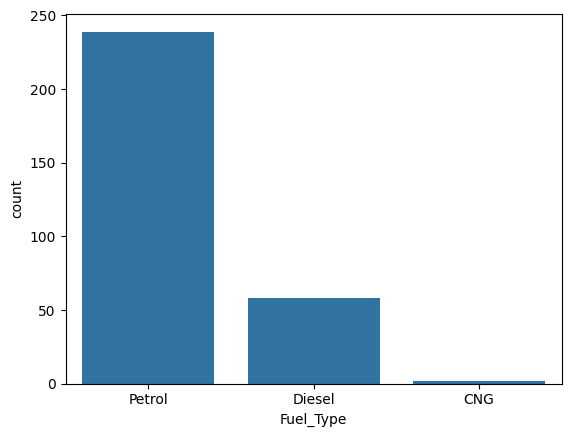

Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64


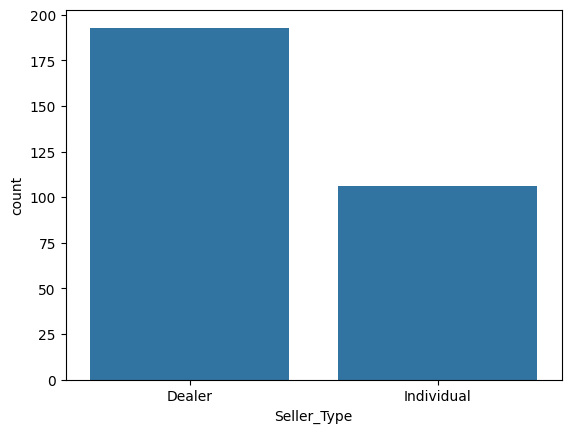

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


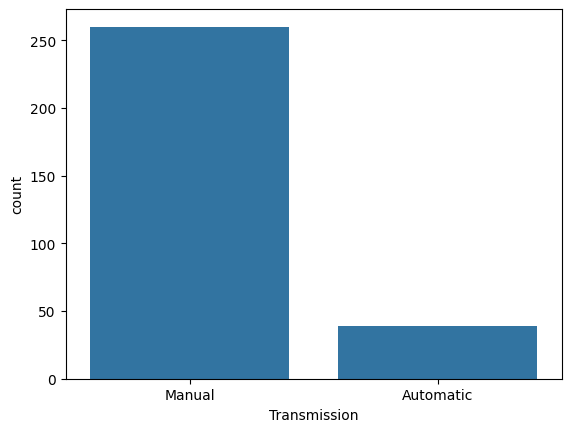

In [22]:
for cat in df_cat:
    print(df[cat].value_counts())
    sns.countplot(x=cat, data=df)
    plt.show()

In [23]:
df_cat.describe()

,Fuel_Type,Seller_Type,Transmission
count,299,299,299
unique,3,2,2
top,Petrol,Dealer,Manual
freq,239,193,260


In [24]:
df_num.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.589632,7.541037,36916.752508,0.043478,5.384615
std,4.984240,8.567887,39015.170352,0.248720,2.896868
min,0.100000,0.320000,500.000000,0.000000,1.000000
25%,0.850000,1.200000,15000.000000,0.000000,3.000000
50%,3.510000,6.100000,32000.000000,0.000000,5.000000
75%,6.000000,9.840000,48883.500000,0.000000,7.000000
max,35.000000,92.600000,500000.000000,3.000000,16.000000


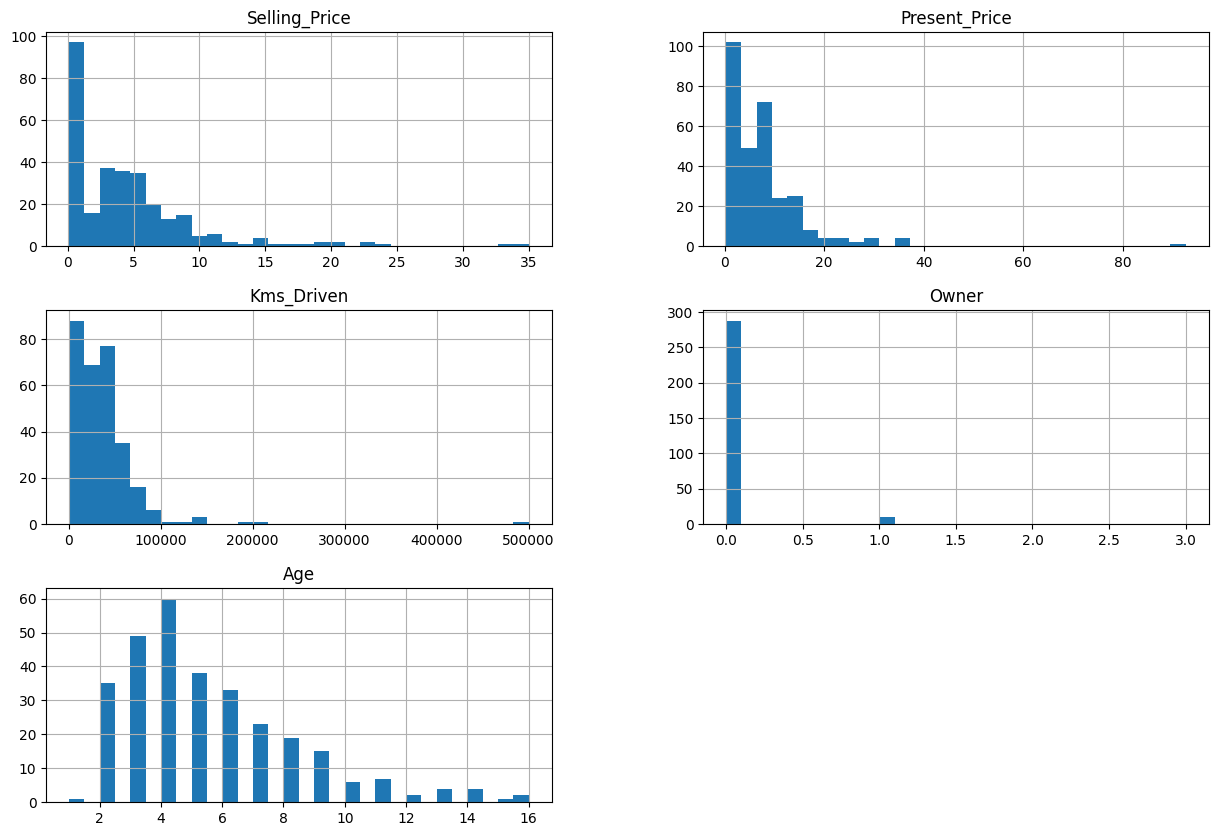

In [25]:
df.hist(figsize = (15,10), bins = 30);

<Figure size 800x600 with 0 Axes>

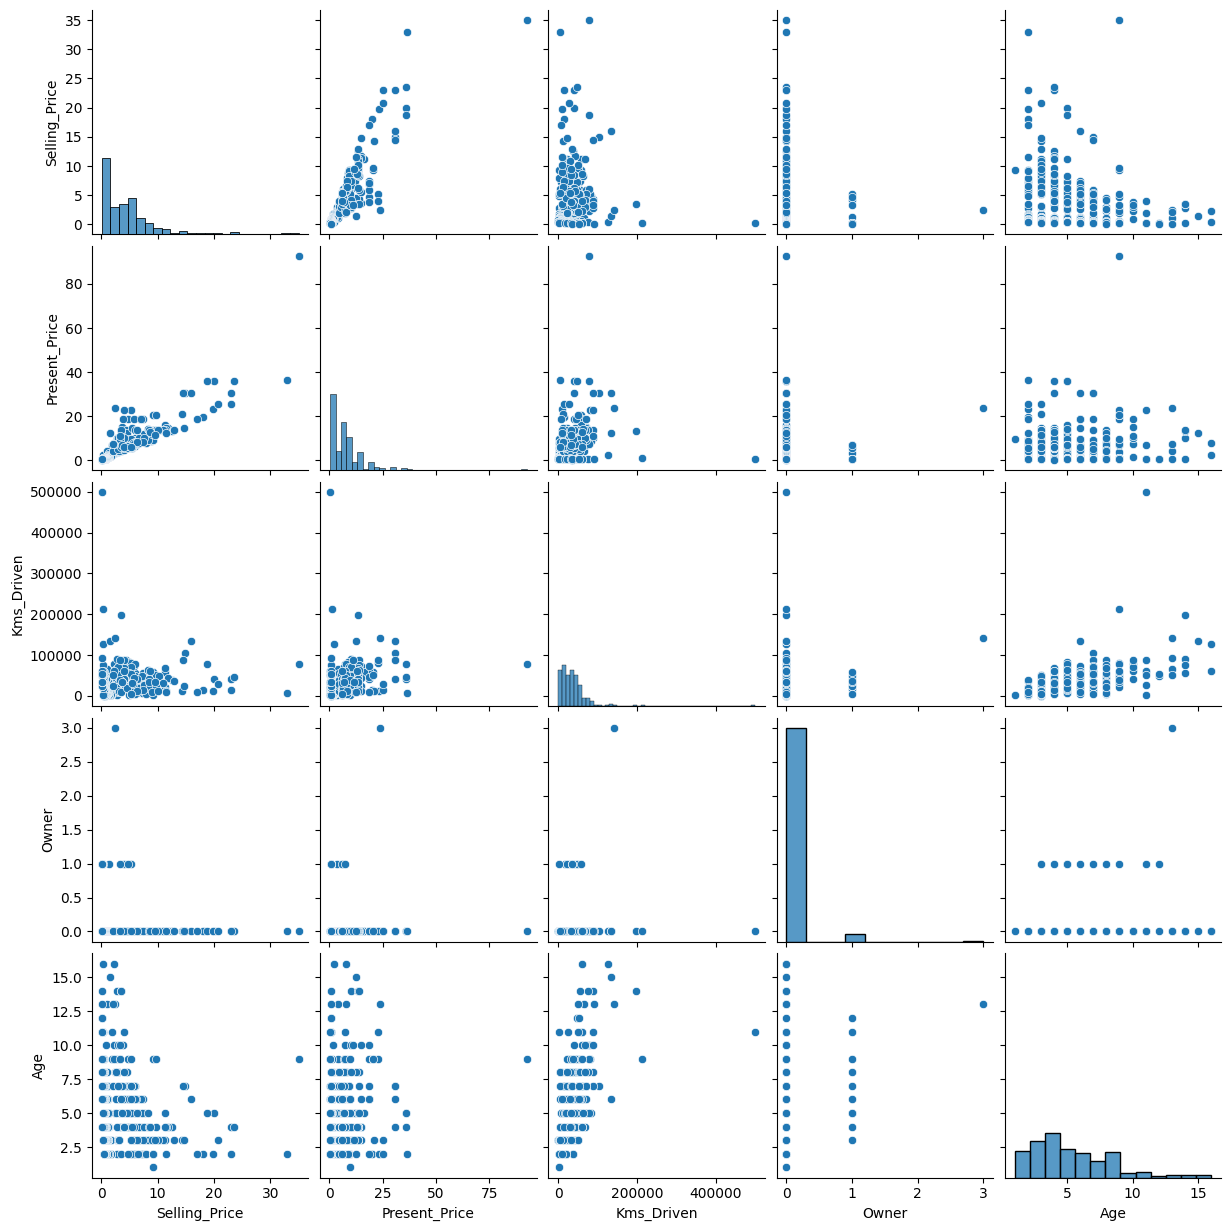

In [26]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: >

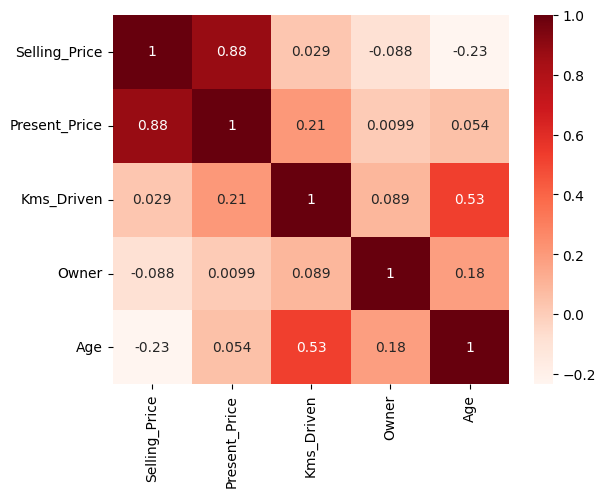

In [27]:
sns.heatmap(df_num.corr(), annot=True, cmap='Reds')

In [28]:
(df[(df['Present_Price']>40)])

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
85,35.0,92.6,78000,Diesel,Dealer,Manual,0,9


In [29]:
(df[(df['Kms_Driven']>250000)])

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
194,0.17,0.52,500000,Petrol,Individual,Automatic,0,11


In [30]:
df.drop(index=[85,194],inplace=True)
df = df.reset_index(drop=True)

In [31]:
df.shape

(297, 8)

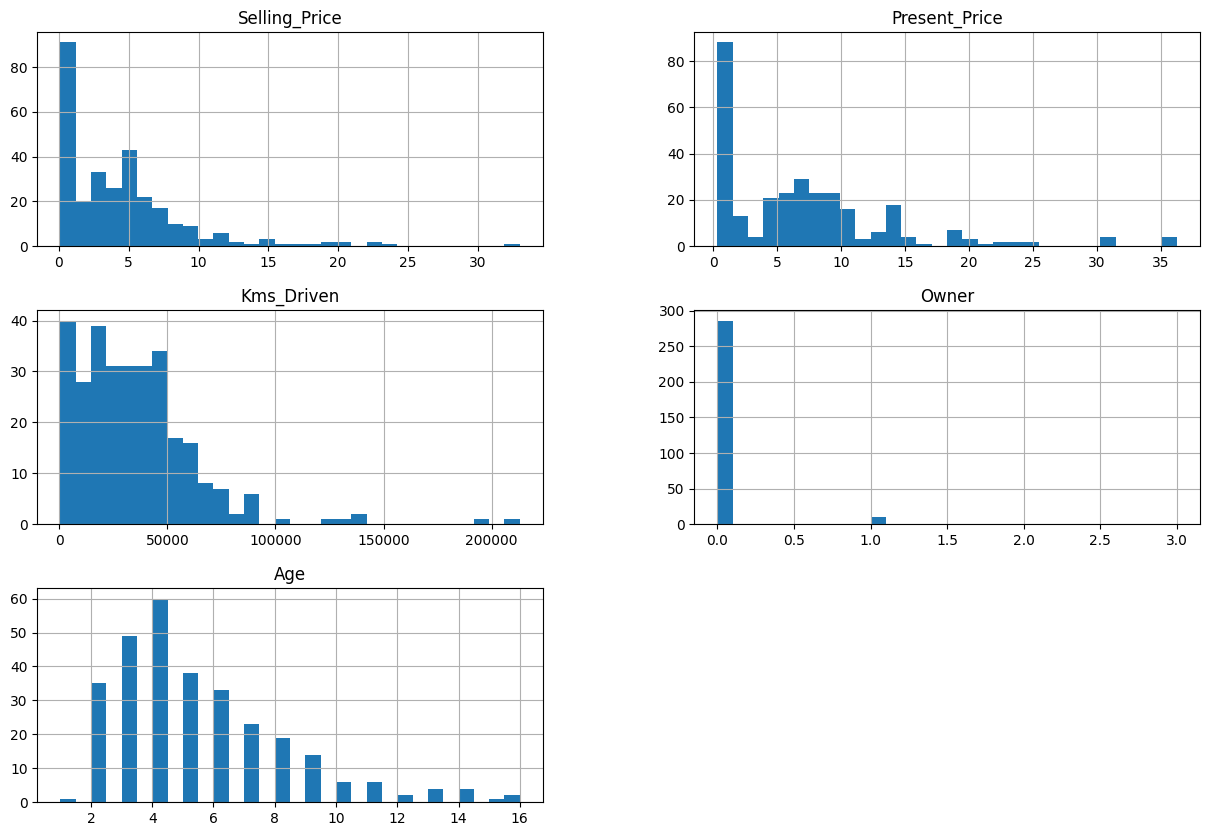

In [32]:
df.hist(figsize = (15,10), bins = 30);

In [33]:
df1=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True, dtype=int)
df1

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,5,0,1,0,1
1,4.75,9.54,43000,0,6,1,0,0,1
2,7.25,9.85,6900,0,2,0,1,0,1
3,2.85,4.15,5200,0,8,0,1,0,1
4,4.60,6.87,42450,0,5,1,0,0,1
...,...,...,...,...,...,...,...,...,...
292,9.50,11.60,33988,0,3,1,0,0,1
293,4.00,5.90,60000,0,4,0,1,0,1
294,3.35,11.00,87934,0,10,0,1,0,1
295,11.50,12.50,9000,0,2,1,0,0,1


In [34]:
df1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.879252,0.061621,-0.090814,-0.274827,0.539739,-0.527661,-0.574873,-0.394655
Present_Price,0.879252,1.000000,0.341814,0.018780,0.021004,0.488270,-0.479855,-0.594662,-0.438805
Kms_Driven,0.061621,0.341814,1.000000,0.134315,0.619827,0.258591,-0.259739,-0.211515,-0.087204
Owner,-0.090814,0.018780,0.134315,1.000000,0.185209,-0.051308,0.053608,0.124512,-0.054087
Age,-0.274827,0.021004,0.619827,0.185209,1.000000,-0.062889,0.058279,0.031543,0.012039
Fuel_Type_Diesel,0.539739,0.488270,0.258591,-0.051308,-0.062889,1.000000,-0.978801,-0.342508,-0.094886
Fuel_Type_Petrol,-0.527661,-0.479855,-0.259739,0.053608,0.058279,-0.978801,1.000000,0.350546,0.087190
Seller_Type_Individual,-0.574873,-0.594662,-0.211515,0.124512,0.031543,-0.342508,0.350546,1.000000,0.072412
Transmission_Manual,-0.394655,-0.438805,-0.087204,-0.054087,0.012039,-0.094886,0.087190,0.072412,1.000000


<Axes: >

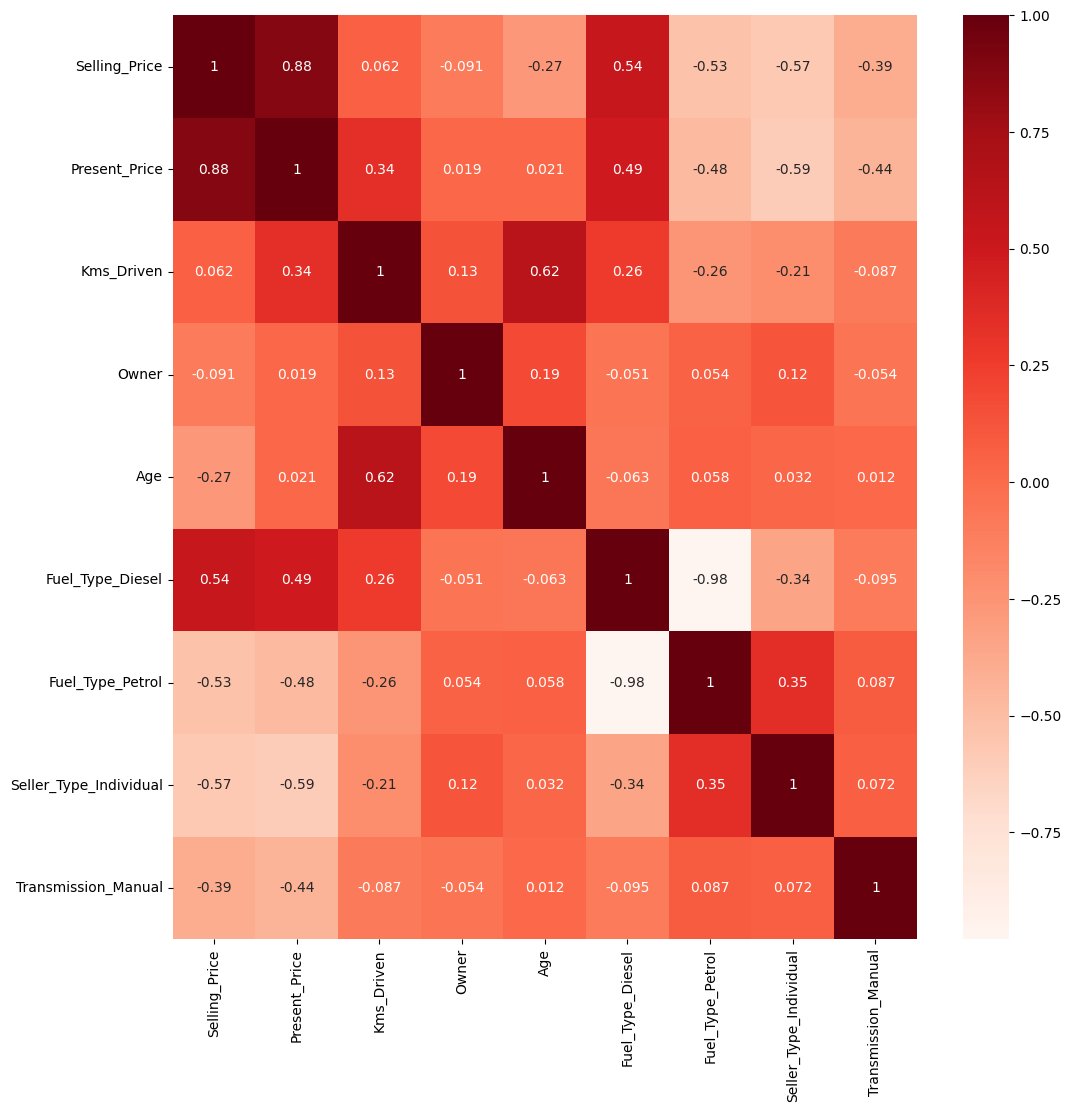

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), annot=True, cmap='Reds')

In [36]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,5,0,1,0,1
1,4.75,9.54,43000,0,6,1,0,0,1
2,7.25,9.85,6900,0,2,0,1,0,1
3,2.85,4.15,5200,0,8,0,1,0,1
4,4.60,6.87,42450,0,5,1,0,0,1


In [37]:
scaler = MinMaxScaler(feature_range=(1,4))
nrm = scaler.fit_transform(df1[['Present_Price', 'Kms_Driven','Age']])
nrm = pd.DataFrame(nrm, columns=['Present_Price', 'Kms_Driven','Age'])
nrm = pd.concat([nrm, df1[['Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual','Owner', 'Selling_Price']]], axis=1)
nrm

,Present_Price,Kms_Driven,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner,Selling_Price
0,1.440267,1.374118,1.8,0,1,0,1,0,3.35
1,1.770259,1.600000,2.0,1,0,0,1,0,4.75
2,1.796157,1.090353,1.2,0,1,0,1,0,7.25
3,1.319967,1.066353,2.4,0,1,0,1,0,2.85
4,1.547201,1.592235,1.8,1,0,0,1,0,4.60
...,...,...,...,...,...,...,...,...,...
292,1.942356,1.472772,1.4,1,0,0,1,0,9.50
293,1.466165,1.840000,1.6,0,1,0,1,0,4.00
294,1.892231,2.234362,2.8,0,1,0,1,0,3.35
295,2.017544,1.120000,1.2,1,0,0,1,0,11.50


In [38]:
X = nrm.drop('Selling_Price',axis=1)
y = nrm['Selling_Price']

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

In [40]:
reg = LinearRegression()

In [41]:
reg.fit(X_train,Y_train)

LinearRegression()

In [42]:
y_pred=reg.predict(X_test)

In [43]:
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,y_pred))

mean_Absolute-Error 1.2691618670344875


In [44]:
print('mean-squared-error',metrics.mean_squared_error(Y_test,y_pred))

mean-squared-error 4.238493074112521


In [45]:
print('r2score',metrics.r2_score(Y_test,y_pred))

r2score 0.8399483193679824


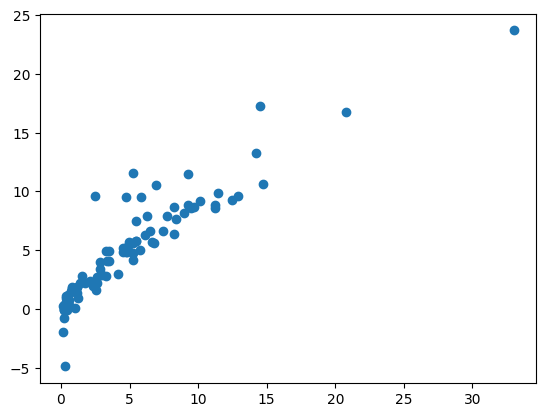

In [46]:
plt.scatter(Y_test,y_pred)

In [47]:
kf = KFold(10)
cross_val = cross_val_score(reg, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [48]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.86410186 0.89912697 0.84419156 0.86223144 0.84512348 0.93674602
 0.85534437 0.90136512 0.81832419 0.87041668]
Train CV mean : 0.87


In [49]:
kf = KFold(5)
cross_val = cross_val_score(reg, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [50]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.88557353 0.88644833 0.90357128 0.89098364 0.83798281]
Train CV mean : 0.881


In [51]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [52]:
Y_pred = decision_tree_regressor.predict(X_test)

In [53]:
mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(np.sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)


In [54]:
print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 1.626
R-squared value of the model is : 0.9


In [55]:
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,Y_pred))
print('mean-squared-error',metrics.mean_squared_error(Y_test,Y_pred))
print('r2score',metrics.r2_score(Y_test,Y_pred))

mean_Absolute-Error 0.8855555555555555
mean-squared-error 2.644302222222222
r2score 0.9001472911798345


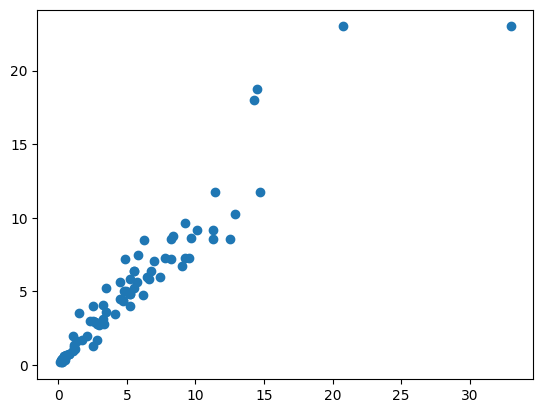

In [56]:
plt.scatter(Y_test,Y_pred)